In [1]:
#Module 4 
#Case Study II
#Domain –Education
#focus – Data analysis
#Business challenge/requirement
#You are a data analyst with University of Cal USA (Not a machine learning expert yet as you still have not
#completed ML with Python Course :-)).The University has data of Math, Physics and Data Structure score of sophomore
#students. This data is stored in different files.
#The University has hired a data science company to do analysis of scores and find if there is any correlation of
#score with age, ethnicity etc. Before the data is given to the company you have to do data wrangling.
#Key issues
#Ensure students identify is not revealed to the agency and only relevant data is
#shared
#Considerations
#NONE
#Data volume-
##In thousands, but only around 1800 records are shared in files MathScoreTerm1.csv  DSScoreTerm1.csv,
#PhysicsScoreTerm1.csv
#Additional information - NA
#Business benefits
#University can get more students enrollment by improving its international ranking through personalized
#course/curriculum for students.

Correlation Analysis :
                 Physics       Age     Maths  DataStructures
Physics         1.000000 -0.012281  0.958925        0.976844
Age            -0.012281  1.000000 -0.025183       -0.014399
Maths           0.958925 -0.025183  1.000000        0.986002
DataStructures  0.976844 -0.014399  0.986002        1.000000




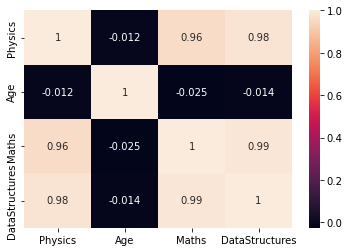

Correlation Matrix is complete




In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df_MathScoreTerm1=pd.read_csv("MathScoreTerm1.csv")
df_DSScoreTerm1=pd.read_csv("DSScoreTerm1.csv")
df_PhysicsScoreTerm1=pd.read_csv("PhysicsScoreTerm1.csv")

#Using loc for replacing Ethinicity Column data

df_MathScoreTerm1.loc[(df_MathScoreTerm1.Ethinicity == 'White American'),'Ethinicity']=1
df_MathScoreTerm1.loc[(df_MathScoreTerm1.Ethinicity == 'European American'),'Ethinicity']=2
df_MathScoreTerm1.loc[(df_MathScoreTerm1.Ethinicity == 'Hispanic'),'Ethinicity']=3
df_MathScoreTerm1.loc[(df_MathScoreTerm1.Ethinicity == 'African American'),'Ethinicity']=4
df_DSScoreTerm1.loc[(df_DSScoreTerm1.Ethinicity == 'White American'),'Ethinicity']=1
df_DSScoreTerm1.loc[(df_DSScoreTerm1.Ethinicity == 'European American'),'Ethinicity']=2
df_DSScoreTerm1.loc[(df_DSScoreTerm1.Ethinicity == 'Hispanic'),'Ethinicity']=3
df_DSScoreTerm1.loc[(df_DSScoreTerm1.Ethinicity == 'African American'),'Ethinicity']=4
df_PhysicsScoreTerm1.loc[(df_PhysicsScoreTerm1.Ethinicity == 'White American'),'Ethinicity']=1
df_PhysicsScoreTerm1.loc[(df_PhysicsScoreTerm1.Ethinicity == 'European American'),'Ethinicity']=2
df_PhysicsScoreTerm1.loc[(df_PhysicsScoreTerm1.Ethinicity == 'Hispanic'),'Ethinicity']=3
df_PhysicsScoreTerm1.loc[(df_PhysicsScoreTerm1.Ethinicity == 'African American'),'Ethinicity']=4

##Using loc for replacing Sex Column data

df_DSScoreTerm1.loc[(df_DSScoreTerm1.Sex == 'M'),'Sex']=1
df_DSScoreTerm1.loc[(df_DSScoreTerm1.Sex == 'F'),'Sex']=2
df_MathScoreTerm1.loc[(df_MathScoreTerm1.Sex == 'M'),'Sex']=1
df_MathScoreTerm1.loc[(df_MathScoreTerm1.Sex == 'F'),'Sex']=2
df_PhysicsScoreTerm1.loc[(df_PhysicsScoreTerm1.Sex == 'M'),'Sex']=1
df_PhysicsScoreTerm1.loc[(df_PhysicsScoreTerm1.Sex == 'F'),'Sex']=2

##Updating Nulls with average marks

v_avg_physics=round(df_PhysicsScoreTerm1["Score"].mean(),0)
v_avg_maths=round(df_MathScoreTerm1["Score"].mean(),0)
v_avg_ds=round(df_DSScoreTerm1["Score"].mean(),0)

df_PhysicsScoreTerm1['Score'] = df_PhysicsScoreTerm1.Score.fillna(v_avg_physics)
df_MathScoreTerm1['Score'] = df_MathScoreTerm1.Score.fillna(v_avg_maths)
df_DSScoreTerm1['Score'] = df_DSScoreTerm1.Score.fillna(v_avg_ds)

##Renaming columns score

df_PhysicsScoreTerm1.rename(columns = {'Score':'Physics'}, inplace = True)
df_MathScoreTerm1.rename(columns = {'Score':'Maths'}, inplace = True)
df_DSScoreTerm1.rename(columns = {'Score':'DataStructures'}, inplace = True)

##Drop Columns
df_PhysicsScoreTerm1.drop(['Name','Subject'], axis=1,inplace=True)
df_MathScoreTerm1.drop(['Name','Subject'], axis=1,inplace=True)
df_DSScoreTerm1.drop(['Name','Subject'], axis=1,inplace=True)

##Merge all three files
df_Phy_Mat=pd.merge(df_PhysicsScoreTerm1,df_MathScoreTerm1[['ID','Maths']],on='ID',how='inner')
df_Phy_Mat_DS=pd.merge(df_Phy_Mat,df_DSScoreTerm1[['ID','DataStructures']],on='ID',how='inner')

##Dropping ID
df_Phy_Mat_DS.drop(['ID'], axis=1,inplace=True)

##File_Creation
df_Phy_Mat_DS.to_csv('ScoreFinal.csv', header=True, index=False)

###Changing Datatype
#
# df_Phy_Mat_DS['Ethinicity']=df_Phy_Mat_DS['Ethinicity'].astype(str).astype(int)
# df_Phy_Mat_DS['Sex']=df_Phy_Mat_DS['Sex'].astype(str).astype(int)

##Correlation Analysis
df_Phy_Mat_DS_corr_matrix=df_Phy_Mat_DS.corr()
print('Correlation Analysis :')
print(df_Phy_Mat_DS_corr_matrix)
print('\n')

##Correlation Matrix
sn.heatmap(df_Phy_Mat_DS_corr_matrix,annot=True)
plt.show()
print('Correlation Matrix is complete')
print('\n')